In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pandas

In [3]:
#necessary libraries
import pandas as pd
import numpy as np

In [4]:
#reading the dataset into a dataframe and showing first 5 rows
dataframe = pd.read_csv("/content/drive/MyDrive/data/corona_tested_individuals_ver_0083.english.csv", low_memory=False)
# dataframe = pd.read_csv("corona_tested_individuals_ver_0083_english.csv", low_memory=False)
dataframe.head(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


In [5]:
#shape of the dataset
dataframe.shape

(2742596, 10)

In [6]:
#null values in the dataset
dataframe.isnull().sum()

test_date                   0
cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       547644
gender                  92886
test_indication             0
dtype: int64

In [7]:
#drop the null values
dataframe.dropna(inplace=True)

In [8]:
#null values in the dataset after dropping null values
dataframe.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [9]:
#shape of the dataset after dropping null values
dataframe.shape

(2186227, 10)

In [10]:
#dropping the date and age column
dataframe.drop('test_date', inplace=True, axis=1)
dataframe.drop('age_60_and_above', inplace=True, axis=1)
dataframe.head(5)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender,test_indication
0,0,0,0,0,0,negative,male,Other
1,0,1,0,0,0,negative,male,Other
2,0,0,0,0,0,negative,female,Other
3,0,0,0,0,0,negative,male,Other
4,0,1,0,0,0,negative,male,Contact with confirmed


In [11]:
#number of unique values in each column
dataframe.nunique()

cough                  2
fever                  2
sore_throat            2
shortness_of_breath    2
head_ache              2
corona_result          3
gender                 2
test_indication        3
dtype: int64

In [12]:
#unique values in each column
for col in dataframe:
    print(col, ': ', dataframe[col].unique())

cough :  [0 1]
fever :  [0 1]
sore_throat :  [0 1]
shortness_of_breath :  [0 1]
head_ache :  [0 1]
corona_result :  ['negative' 'positive' 'other']
gender :  ['male' 'female']
test_indication :  ['Other' 'Contact with confirmed' 'Abroad']


In [13]:
#dropping the rows with other corona results
dataframe = dataframe[dataframe.corona_result != 'other']
dataframe['corona_result'].value_counts()

negative    1943172
positive     208726
Name: corona_result, dtype: int64

In [14]:
#checking the final shape of the dataset
dataframe.shape

(2151898, 8)

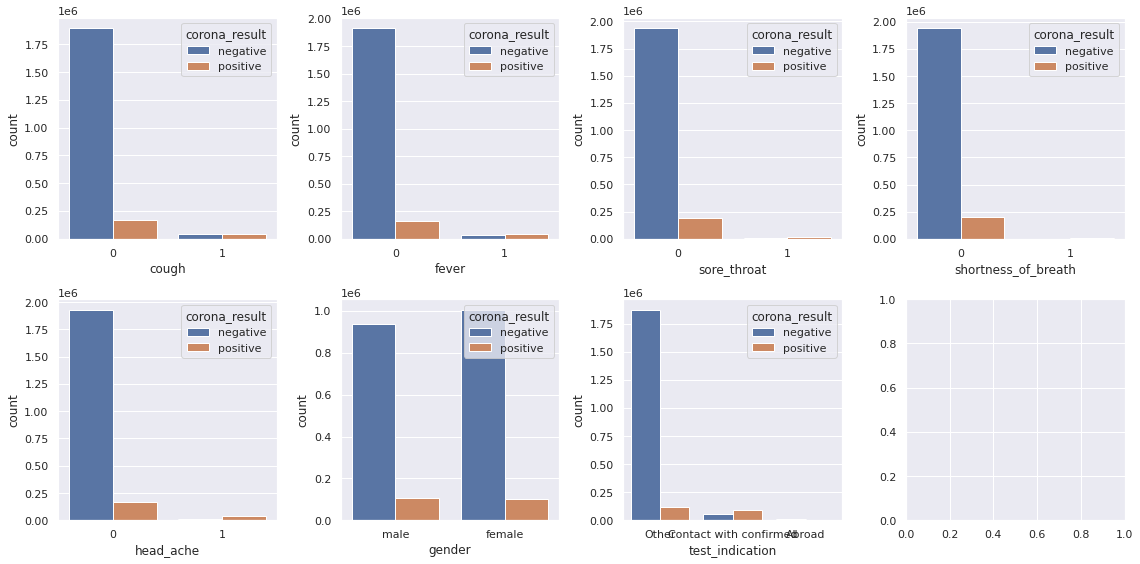

In [15]:
#corona_result in term of cough feature
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
fig, ax = plt.subplots(2,4)
sns.countplot(x="cough", hue="corona_result", data=dataframe, ax=ax[0,0])
sns.countplot(x="fever", hue="corona_result", data=dataframe, ax=ax[0,1])
sns.countplot(x="sore_throat", hue="corona_result", data=dataframe, ax=ax[0,2])
sns.countplot(x="shortness_of_breath", hue="corona_result", data=dataframe, ax=ax[0,3])
sns.countplot(x="head_ache", hue="corona_result", data=dataframe, ax=ax[1,0])
#sns.countplot(x="age_60_and_above", hue="corona_result", data=dataframe, ax=ax[1,1])
sns.countplot(x="gender", hue="corona_result", data=dataframe, ax=ax[1,1])
sns.countplot(x="test_indication", hue="corona_result", data=dataframe, ax=ax[1,2])
plt.tight_layout()

In [16]:
#convreting the cetegorical values into numerical values
pd.options.mode.chained_assignment = None
dataframe['corona_result'].replace(['negative', 'positive'], [0, 1], inplace=True)
#dataframe['age_60_and_above'].replace(['No', 'Yes'], [0, 1], inplace=True)
dataframe['gender'].replace(['male', 'female'], [1, 0], inplace=True)
dataframe['test_indication'].replace(['Other', 'Contact with confirmed', 'Abroad'], [0, 1, 2], inplace=True)

dataframe.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender,test_indication
0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,1,1


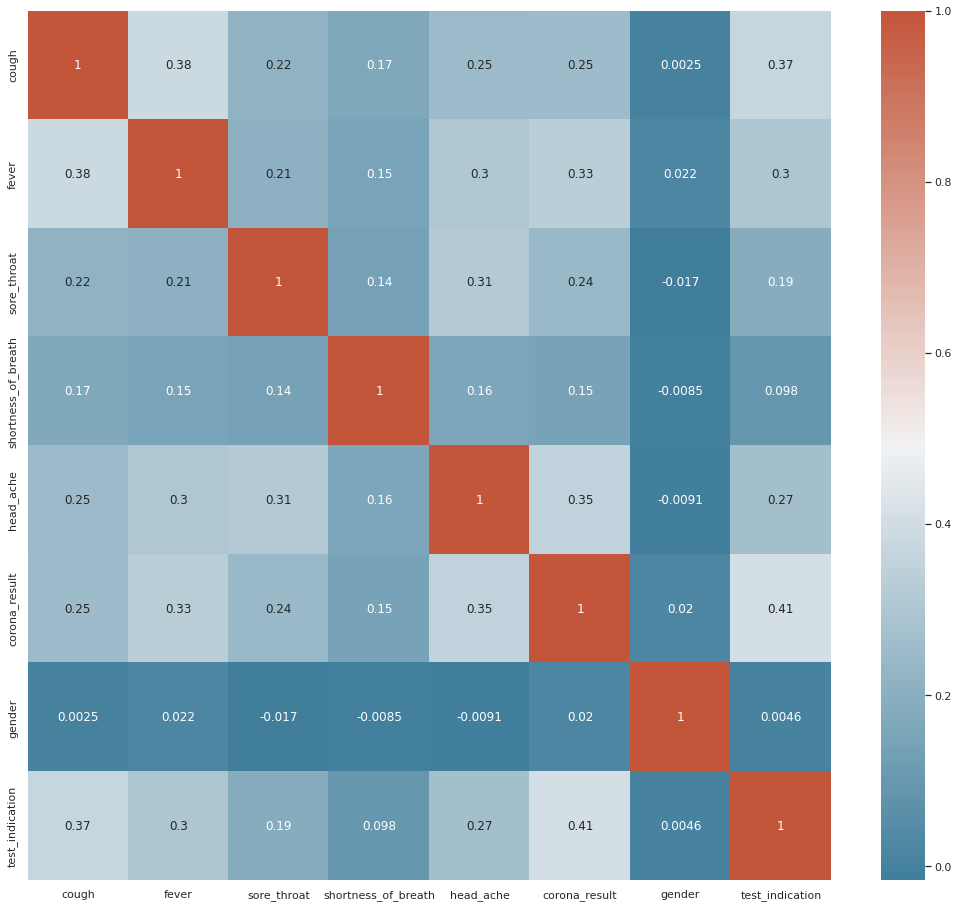

In [17]:
#ploting a heatmap showing the coorelation
plt.figure(figsize=(18, 16))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(dataframe.corr(), cmap=cmap, annot=True)

# Model Training

### Spliting data into test and train set

In [18]:
#features
X = dataframe.drop('corona_result',axis=1)

#target variable
y = dataframe['corona_result']

In [19]:
#count of positive and negative case in the dataset
from collections import Counter

print('Dataset shape %s' % Counter(y))

Dataset shape Counter({0: 1943172, 1: 208726})


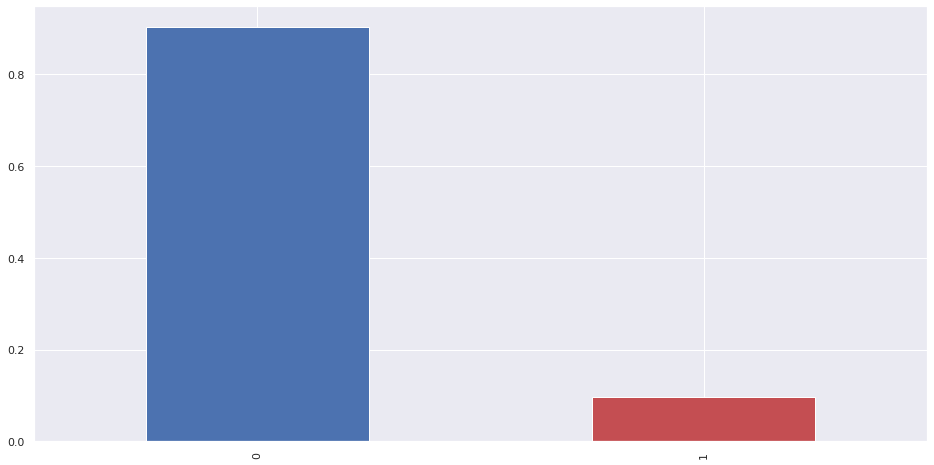

In [20]:
#plot it for a better visualization
class_distribution = pd.Series(y).value_counts(normalize=True)
my_colors = ['b', 'r', 'g', 'y', 'k']
ax = class_distribution.plot.bar(color=my_colors)

In [21]:
#undersampling data to balance it
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=0.8, random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 260907, 1: 208726})


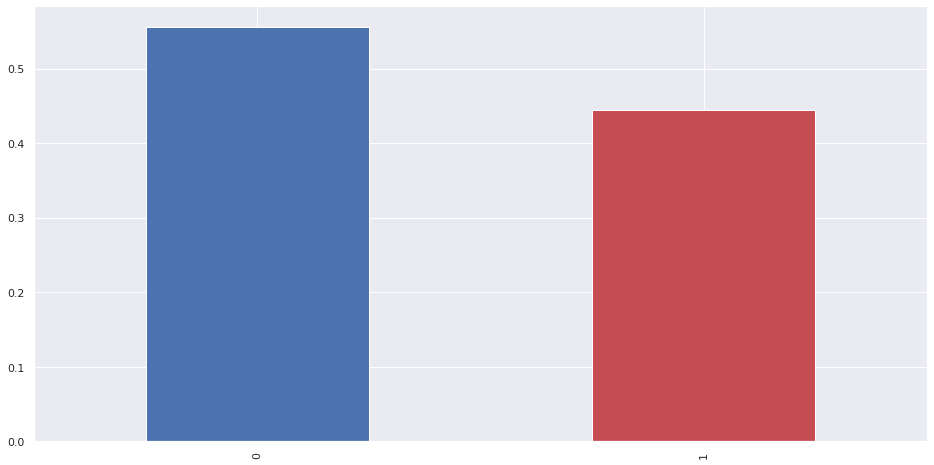

In [22]:
#plot it for a better visualization
class_distribution = pd.Series(y_res).value_counts(normalize=True)
my_colors = ['b', 'r', 'g', 'y', 'k']
ax = class_distribution.plot.bar(color=my_colors)

In [23]:
#splitting the data into 75% train data and 25% test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [24]:
#number of training data
X_train.shape

(1613923, 7)

In [25]:
#number of test data
X_test.shape

(537975, 7)

###Lime (Black Box)

In [26]:
from sklearn.ensemble import AdaBoostClassifier
classifier=AdaBoostClassifier()
classifier.fit(X_train,y_train)

AdaBoostClassifier()

In [27]:
#from sklearn.ensemble import RandomForestClassifier
#classifier=RandomForestClassifier()
#classifier.fit(X_train,y_train)

In [28]:
import pickle
pickle.dump(classifier, open("classifier.pkl", 'wb'))

In [29]:
!pip install lime

     |████████████████████████████████| 275 kB 5.3 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=c60bffd7b9d5f558b49bdd225ffa8629d058c74f9185287df79db2e7c4959e7f
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [30]:
import lime
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification'
)

In [31]:
X_test.iloc[14]

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
gender                 1
test_indication        0
Name: 1467871, dtype: int64

In [32]:
exp = interpretor.explain_instance(
    data_row=X_test.iloc[14], ##new data
    predict_fn=classifier.predict_proba
)

exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


###Shapash

In [33]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200).fit(X_train,y_train)

In [ ]:
!pip install shapash

     |████████████████████████████████| 899 kB 5.0 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 3.3 MB 54.3 MB/s 
     |████████████████████████████████| 564 kB 69.7 MB/s 
     |████████████████████████████████| 642 kB 68.2 MB/s 
     |████████████████████████████████| 1.0 MB 50.2 MB/s 
     |████████████████████████████████| 9.6 MB 50.0 MB/s 
     |████████████████████████████████| 210 kB 69.2 MB/s 
     |████████████████████████████████| 34.5 MB 1.2 MB/s 
     |████████████████████████████████| 357 kB 73.6 MB/s 
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-py3-none-any.whl size=1013944 sha256=8afe466e596db306a3953c5b7c4e16c8f7fbdfa792e9850c2f414d3abb099022
  Stored in directory: /root/.cache/pip/wheels/71/17/b0/8bebc086e55a01cf4036902b6ca05fce3fb4c7fd48dbd07717
  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl size=669714 sha256=204056cc0ae1ff8dbc91591ac1684a42f84e24cd401099d84483e854db

In [ ]:
pip install Werkzeug==2.0.0

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [ ]:
from shapash.explainer.smart_explainer import SmartExplainer

In [ ]:
xpl = SmartExplainer()

In [ ]:
xpl.compile(
    x=X_test,
    model=regressor,
   
)

Backend: Shap TreeExplainer


In [ ]:

xpl


In [ ]:
app = xpl.run_app(title_story='Dataset')

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\shapash\webapp\smart_app.py:307: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.

INFO:root:Your Shapash application run on http://LAPTOP-P345JCJQ:8050/
INFO:root:Use the method .kill() to down your app.


Dash is running on http://0.0.0.0:8050/



INFO:shapash.webapp.smart_app:Dash is running on http://0.0.0.0:8050/



 * Serving Flask app 'shapash.webapp.smart_app' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://192.168.0.106:8050/ (Press CTRL+C to quit)
INFO:werkzeug:192.168.0.106 - - [12/Apr/2022 03:17:47] "GET / HTTP/1.1" 200 -
INFO:werkzeug:192.168.0.106 - - [12/Apr/2022 03:17:47] "GET /assets/material-icons.css?m=1649441006.6471558 HTTP/1.1" 200 -
INFO:werkzeug:192.168.0.106 - - [12/Apr/2022 03:17:47] "GET /assets/style.css?m=1649441006.6521425 HTTP/1.1" 200 -
INFO:werkzeug:192.168.0.106 - - [12/Apr/2022 03:17:47] "GET /_dash-component-suites/dash_renderer/react@16.v1_8_3m1604000066.14.0.min.js HTTP/1.1" 200 -
INFO:werkzeug:192.168.0.106 - - [12/Apr/2022 03:17:47] "GET /_dash-component-suites/dash_renderer/polyfill@7.v1_8_3m1604000066.8.7.min.js HTTP/1.1" 200 -
INFO:werkzeug:192.168.0.106 - - [12/Apr/2022 03:17:47] "GET /_dash-component-suites/dash_renderer/react-dom@16.v1_8_3m1604000066.14.0.min.js HTTP/1.1" 200 -
INFO:werkzeug:192.168.0.106 - - [12/Apr/2022 03:17:47] "GET /_dash-component-suites/dash_renderer/prop-types@15.v1_8_3m1604000066.7.2.min.js 

In [ ]:
predictor = xpl.to_smartpredictor()

In [ ]:
predictor.save('./corona_tested_individuals_ver_0083_english.csv')

In [ ]:
from shapash.utils.load_smartpredictor import load_smartpredictor
predictor_load = load_smartpredictor('./corona_tested_individuals_ver_0083_english.csv')

Make a prediction with **SmartPredictor**

In [ ]:
predictor_load.add_input(x=X, ypred=y)

INFO:werkzeug:192.168.0.106 - - [12/Apr/2022 14:41:01] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:192.168.0.106 - - [12/Apr/2022 14:41:01] "POST /_dash-update-component HTTP/1.1" 200 -


In [ ]:
detailed_contributions = predictor_load.detail_contributions()

INFO:werkzeug:192.168.0.106 - - [12/Apr/2022 14:41:03] "GET / HTTP/1.1" 200 -
INFO:werkzeug:192.168.0.106 - - [12/Apr/2022 14:41:03] "GET / HTTP/1.1" 200 -
INFO:werkzeug:192.168.0.106 - - [12/Apr/2022 14:41:03] "GET / HTTP/1.1" 200 -
INFO:werkzeug:192.168.0.106 - - [12/Apr/2022 14:41:03] "GET / HTTP/1.1" 200 -
INFO:werkzeug:192.168.0.106 - - [12/Apr/2022 14:41:03] "GET / HTTP/1.1" 200 -
INFO:werkzeug:192.168.0.106 - - [12/Apr/2022 14:41:03] "GET / HTTP/1.1" 200 -
INFO:werkzeug:192.168.0.106 - - [12/Apr/2022 14:41:03] "GET / HTTP/1.1" 200 -
INFO:werkzeug:192.168.0.106 - - [12/Apr/2022 14:41:03] "GET / HTTP/1.1" 200 -
INFO:werkzeug:192.168.0.106 - - [12/Apr/2022 14:41:03] "GET / HTTP/1.1" 200 -
INFO:werkzeug:192.168.0.106 - - [12/Apr/2022 14:41:03] "GET / HTTP/1.1" 200 -
INFO:werkzeug:192.168.0.106 - - [12/Apr/2022 20:47:25] "GET /assets/style.css?m=1649441006.6521425 HTTP/1.1" 304 -
INFO:werkzeug:192.168.0.106 - - [12/Apr/2022 20:47:25] "GET /assets/material-icons.css?m=1649441006.64715

In [ ]:
detailed_contributions.head()

,corona_result,cough,fever,sore_throat,shortness_of_breath,head_ache,gender,test_indication
0,0,-0.001316,-0.008288,-0.001712,-0.000504,-0.008841,0.004924,-0.038328
1,0,0.024481,0.469614,-0.012191,-0.003812,-0.005873,0.021313,-0.023171
2,0,-0.001199,-0.007604,-0.001708,-0.000513,-0.009128,-0.004763,-0.038822
3,0,-0.001316,-0.008288,-0.001712,-0.000504,-0.008841,0.004924,-0.038328
4,0,0.015456,0.269547,-0.006814,-0.002019,-0.008555,0.007838,0.332360


Summarize explanability of the **predictions**

In [ ]:
predictor_load.modify_mask(max_contrib=3)

In [ ]:
explanation = predictor_load.summarize()

In [ ]:
explanation.head()

,corona_result,feature_1,value_1,contribution_1,feature_2,value_2,contribution_2,feature_3,value_3,contribution_3
0,0,test_indication,0.0,-0.038328,head_ache,0.0,-0.008841,fever,0.0,-0.008288
1,0,fever,1.0,0.469614,cough,0.0,0.024481,test_indication,0.0,-0.023171
2,0,test_indication,0.0,-0.038822,head_ache,0.0,-0.009128,fever,0.0,-0.007604
3,0,test_indication,0.0,-0.038328,head_ache,0.0,-0.008841,fever,0.0,-0.008288
4,0,test_indication,1.0,0.33236,fever,1.0,0.269547,cough,0.0,0.015456


In [ ]:
# Applying SMOTE

In [35]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=0) 
X_smote, y_smote = sm.fit_resample(X_train, y_train) 
 
np.bincount(y_smote)

array([1457216, 1457216])

###Ensemble

**Ada Boost**

In [36]:
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
adaBoostModel = AdaBoostClassifier(n_estimators=250, learning_rate=1)
ada = adaBoostModel.fit(X_smote, y_smote)

y_predict = ada.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

Accuracy:  0.9265319020400576
              precision    recall  f1-score   support

           0       0.96      0.96      0.96    485956
           1       0.62      0.63      0.62     52019

    accuracy                           0.93    537975
   macro avg       0.79      0.79      0.79    537975
weighted avg       0.93      0.93      0.93    537975



In [37]:
#showing the actual corona result and predicted corona result side by side
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
result

,Actual,Predicted
628549,0,0
184491,0,0
36036,0,0
1633189,0,0
1528526,0,0
...,...,...
1141316,0,0
371092,0,0
101296,0,0
66571,0,0


In [38]:
#Evaluating ADABOOST model


In [39]:
#necessary library
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix

In [40]:
#Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.96      0.96      0.96    485956
    Positive       0.62      0.63      0.62     52019

    accuracy                           0.93    537975
   macro avg       0.79      0.79      0.79    537975
weighted avg       0.93      0.93      0.93    537975



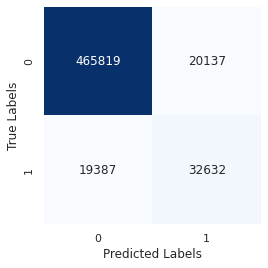

In [41]:
#confusion matrix

cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()

In [42]:
#mean squared error
mean_squared_error(y_test, y_predict)

0.07346809795994237

In [43]:
#mean absolute error
mean_absolute_error(y_test, y_predict)

0.07346809795994237

In [44]:
#r2 Score
r2_score(y_test, y_predict)


0.15886822958575242

**XgBoost**

In [45]:
!pip install xgboost

In [46]:
import xgboost
# from xgboost.training import train

In [47]:
xgboosttrain = xgboost.DMatrix(X_smote, label=y_smote)
xgboosttest = xgboost.DMatrix(X_test, label=y_test)

In [48]:
param = {'max depth': 4, 'eta': 0.25, 'objective': 'multi:softmax', 'num_class': 10}
epochs = 15

In [49]:
from xgboost.training import train

In [50]:
xgboostModel = xgboost.train(param, xgboosttrain, epochs)
# xgbModel = train(param, xgbtrain, epochs)
xgboostPredict = xgboostModel.predict(xgboosttest)

In [51]:
print("Accuracy: ", metrics.accuracy_score(y_test, xgboostPredict))
print(classification_report(y_test, xgboostPredict))

Accuracy:  0.9218067754077792
              precision    recall  f1-score   support

           0       0.96      0.95      0.96    485956
           1       0.59      0.65      0.62     52019

    accuracy                           0.92    537975
   macro avg       0.77      0.80      0.79    537975
weighted avg       0.93      0.92      0.92    537975



In [52]:
# # import xgboost as xgb
# # from xgb.training import train
# # import xgboost
# # from xgboost.training import train
# # import xgboost
# # from xgboost.training import train

# import xgboost as xgb
# from xgb.training import train

# xgbtrain = xgb.DMatrix(X_smote, label=y_smote)
# xgbtest = xgb.DMatrix(X_test, label=y_test)

# param = {'max depth': 4, 'eta': 0.25, 'objective': 'multi:softmax', 'num_class': 10}
# epochs = 15

# xgbModel = xgb.train(param, xgbtrain, epochs)
# # xgbModel = train(param, xgbtrain, epochs)
# xgbPredict = xgbModel.predict(xgbtest)

# print("Accuracy: ", metrics.accuracy_score(y_test, xgbPredict))
# print(classification_report(y_test, xgbPredict))


In [53]:
#showing the actual corona result and predicted corona result side by side
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
result

,Actual,Predicted
628549,0,0
184491,0,0
36036,0,0
1633189,0,0
1528526,0,0
...,...,...
1141316,0,0
371092,0,0
101296,0,0
66571,0,0


In [54]:
###Evaluating XGBOOST model

In [55]:
#necessary library
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix

In [56]:
#Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.96      0.96      0.96    485956
    Positive       0.62      0.63      0.62     52019

    accuracy                           0.93    537975
   macro avg       0.79      0.79      0.79    537975
weighted avg       0.93      0.93      0.93    537975



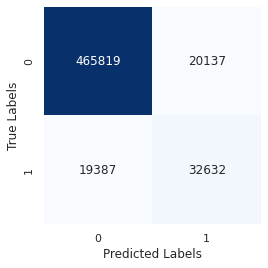

In [57]:
#confusion matrix

cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()

In [58]:
#mean squared error
mean_squared_error(y_test, y_predict)

0.07346809795994237

In [59]:
#mean absolute error
mean_absolute_error(y_test, y_predict)

0.07346809795994237

In [60]:
#r2 Score
r2_score(y_test, y_predict)

0.15886822958575242

In [61]:
#Model Performance Comparison`


In [62]:
#ROC & DET Curve

In [65]:
import xgboost
from sklearn.ensemble import AdaBoostClassifier
#N_SAMPLES = 1000

classifiers = {
    "adaBoostModel": AdaBoostClassifier(n_estimators=250, learning_rate=1),
    "xgboost": param(max_depth= 4, num_class= 10, eta= 0.25, objective= 'multi:softmax'),
    }


# prepare plots
fig, [ax_roc, ax_det] = plt.subplots(2, 1, figsize=(10, 10))

TypeError: ignored

In [64]:
# from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

# #N_SAMPLES = 1000

# classifiers = {
#     "Logistic Regression": LogisticRegression(),
#     "Decision Tree": DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=7),
#     "Random Forest": RandomForestClassifier(random_state=0),
#     "KNN": KNeighborsClassifier(n_neighbors=25, n_jobs=-1),
# }


# # prepare plots
# fig, [ax_roc, ax_det] = plt.subplots(2, 1, figsize=(10, 10))

In [ ]:
# adaBoostModel = AdaBoostClassifier(n_estimators=250, learning_rate=1)
# param = {'max depth': 4, 'eta': 0.25, 'objective': 'multi:softmax', 'num_class': 10}
# epochs = 15

In [66]:
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay
import xgboost
#N_SAMPLES = 1000

classifiers = {
    "adaBoostModel": AdaBoostClassifier(n_estimators=250, learning_rate=1),
    "xgboost": xgboost("max_depth"= 4, "eta"= 0.25, "objective"= "multi:softmax", "num_class"= 10),
    }


# prepare plots
fig, [ax_roc, ax_det] = plt.subplots(2, 1, figsize=(10, 10))

# for name, clf in classifiers.items():
#     clf.fit(X_train, y_train)

#     RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=name)
#     DetCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_det, name=name)

# ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
# ax_det.set_title("Detection Error Tradeoff (DET) curves")

# ax_roc.grid(linestyle="--")
# ax_det.grid(linestyle="--")

# plt.legend()
# plt.show()

SyntaxError: ignored

### Linear Regression Model

In [ ]:
#necessary library
from sklearn.linear_model import LinearRegression

In [ ]:
#training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#prediction on test data
predictions = model.predict(X_test)

In [ ]:
#showing the actual corona result and predicted corona result side by side
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result

,Actual,Predicted
628549,0,0.056933
184491,0,0.056933
36036,0,0.056933
1633189,0,0.056933
1528526,0,0.045882
...,...,...
1141316,0,0.045882
371092,0,0.056933
101296,0,0.056933
66571,0,0.045882


In [ ]:
#model's accurary score
model.score(X_test, y_test)

0.2681026816259069

In [ ]:
#save the model
import pickle

filename = 'LinearRegression_model.sav'
pickle.dump(model, open(filename, 'wb'))

### Apply smote in Logistic Regression Model

In [ ]:
#necessary library
from sklearn.linear_model import LogisticRegression

In [ ]:
#training the model
log_model = LogisticRegression()
log_model.fit(X_smote, y_smote)

LogisticRegression()

In [ ]:
#prediction on test data
predictions = log_model.predict(X_test)

In [ ]:
#showing the actual corona result and predicted corona result side by side
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result

,Actual,Predicted
628549,0,0
184491,0,0
36036,0,0
1633189,0,0
1528526,0,0
...,...,...
1141316,0,0
371092,0,0
101296,0,0
66571,0,0


In [ ]:
#model's accurary score
log_model.score(X_test, y_test)

0.9202026116455225

In [ ]:
#save the model
import pickle

filename = 'LogisticRegression_model.sav'
pickle.dump(log_model, open(filename, 'wb'))

#### Evaluating logistic regression model

In [ ]:
#necessary library
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix

In [ ]:
#Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.96      0.95      0.96    485956
    Positive       0.58      0.64      0.61     52019

    accuracy                           0.92    537975
   macro avg       0.77      0.80      0.78    537975
weighted avg       0.92      0.92      0.92    537975



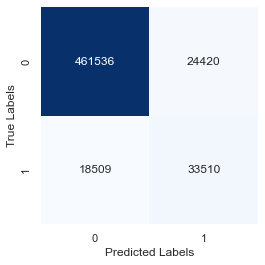

In [ ]:
#confusion matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()


In [ ]:
#mean squared error
mean_squared_error(y_test, predictions)

0.07979738835447744

In [ ]:
#mean absolute error
mean_absolute_error(y_test, predictions)

0.07979738835447744

In [ ]:
#r2 Score
r2_score(y_test, predictions)

0.08640457008113467

### Apply Smote in Decision Tree Model

In [ ]:
#finding optimum depth for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depth = []
for i in range(1, 10):
    d_tree = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=i)
    d_tree.fit(X_smote, y_smote)
    y_predict = d_tree.predict(X_test)
    depth.append(accuracy_score(y_test, y_predict))
    print('Depth= ', i, ": ", accuracy_score(y_test, y_predict))

Depth=  1 :  0.9151466146196384
Depth=  2 :  0.9182768716018402
Depth=  3 :  0.9272178075189368
Depth=  4 :  0.9211078581718481
Depth=  5 :  0.9215985872949487
Depth=  6 :  0.9218030577629072
Depth=  7 :  0.9218030577629072
Depth=  8 :  0.9218049165853431
Depth=  9 :  0.9218049165853431


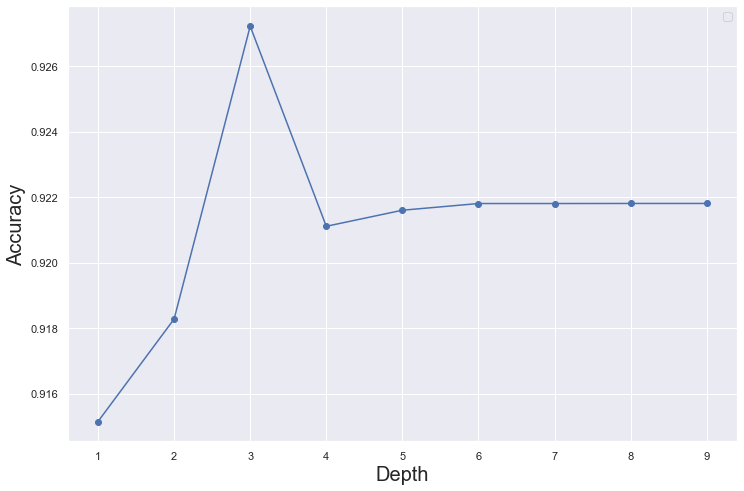

In [ ]:
#ploting the accuracies for different tree depth
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), depth, marker='o')
plt.xlabel('Depth', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(range(1, 10))
legend_prop = {'weight':'bold'}
plt.legend(prop=legend_prop)
plt.show()

In [ ]:
#making model with depth=7 for prediction
d_tree = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=7)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=100)

In [ ]:
#prediction on test data
predictions = d_tree.predict(X_test)

In [ ]:
#showing the actual corona result and predicted corona result side by side
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result

,Actual,Predicted
628549,0,0
184491,0,0
36036,0,0
1633189,0,0
1528526,0,0
...,...,...
1141316,0,0
371092,0,0
101296,0,0
66571,0,0


In [ ]:
#model's accurary score
d_tree.score(X_test, y_test)

0.929716064872903

In [ ]:
#save the model
import pickle

filename = 'DecisionTree_model.sav'
pickle.dump(d_tree, open(filename, 'wb'))

#### Evaluating Decision Tree model

In [ ]:
#classification report for Decision Tree
print(classification_report(y_test, predictions, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.96      0.97      0.96    485956
    Positive       0.65      0.59      0.62     52019

    accuracy                           0.93    537975
   macro avg       0.80      0.78      0.79    537975
weighted avg       0.93      0.93      0.93    537975



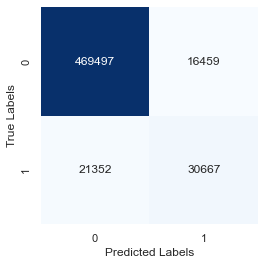

In [ ]:
#confusion matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()

In [ ]:
#mean squared error
mean_squared_error(y_test, predictions)

0.07028393512709698

In [ ]:
#mean absolute error
mean_absolute_error(y_test, predictions)

0.07028393512709698

In [ ]:
#r2 Score
r2_score(y_test, predictions)

0.19532351555679806

### Apply Smote in Random Forest Model

In [ ]:
#creating model and making predicton
from sklearn.ensemble import RandomForestClassifier

r_forest = RandomForestClassifier(random_state=0)
r_forest.fit(X_smote, y_smote)

RandomForestClassifier(random_state=0)

In [ ]:
#prediction on test data
predictions = r_forest.predict(X_test)


In [ ]:
#showing the actual corona result and predicted corona result side by side
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result

,Actual,Predicted
628549,0,0
184491,0,0
36036,0,0
1633189,0,0
1528526,0,0
...,...,...
1141316,0,0
371092,0,0
101296,0,0
66571,0,0


In [ ]:
#model's accurary score
r_forest.score(X_test, y_test)

0.9218067754077792

In [ ]:
#save the model

filename = 'RandomForest_model.sav'
pickle.dump(r_forest, open(filename, 'wb'))

#### Evaluating Random Forest model

In [ ]:
#Classification Report

print(classification_report(y_test, predictions, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.96      0.95      0.96    485956
    Positive       0.59      0.65      0.62     52019

    accuracy                           0.92    537975
   macro avg       0.77      0.80      0.79    537975
weighted avg       0.93      0.92      0.92    537975



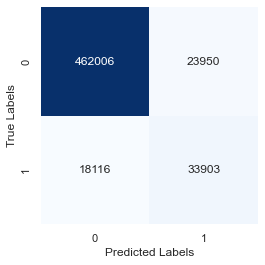

In [ ]:
#confusion matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()

In [ ]:
#mean squared error
mean_squared_error(y_test, predictions)

0.07819322459222083

In [ ]:
#mean absolute error
mean_absolute_error(y_test, predictions)

0.07819322459222083

In [ ]:
#r2 Score
r2_score(y_test, predictions)

0.10477054310682787

### Apply Smote in KNN Model

Creating a smaller subset of test data for KNN

In [ ]:
d_X_test = X_test.head(10000)
#d_X_test.value_counts()

In [ ]:
d_y_test = y_test.head(10000)
d_y_test.value_counts()

0    9062
1     938
Name: corona_result, dtype: int64

Training the model

In [ ]:
#necessary library
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#making model with k=25 for prediction
KNN = KNeighborsClassifier(n_neighbors=25, n_jobs=-1)
KNN.fit(X_smote, y_smote)

KNeighborsClassifier(n_jobs=-1, n_neighbors=25)

In [ ]:
#prediction on test data
predictions = KNN.predict(X_test)

In [ ]:
#showing the actual corona result and predicted corona result side by side
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result

,Actual,Predicted
628549,0,0
184491,0,0
36036,0,0
1633189,0,0
1528526,0,0
...,...,...
1141316,0,0
371092,0,0
101296,0,0
66571,0,0


In [ ]:
#model's accurary score
KNN.score(X_test, y_test)

0.9288777359542729

In [ ]:
#save the model

filename = 'KNN_model.sav'
pickle.dump(KNN, open(filename, 'wb'))

#### Evaluating KNN model

In [ ]:
#Classification Report

print(classification_report(y_test, predictions, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.95      0.97      0.96    485956
    Positive       0.66      0.55      0.60     52019

    accuracy                           0.93    537975
   macro avg       0.81      0.76      0.78    537975
weighted avg       0.92      0.93      0.93    537975



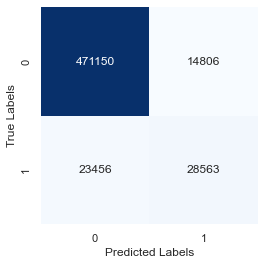

In [ ]:
#confusion matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()

In [ ]:
#mean squared error
mean_squared_error(y_test, predictions)

0.07112226404572704

In [ ]:
#mean absolute error
mean_absolute_error(y_test, predictions)

0.07112226404572704

In [ ]:
#r2 Score
r2_score(y_test, predictions)

0.18572553892344046

# Training ANN Model

### Creating the model

In [ ]:
#necessary library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [ ]:
X_smote.shape

(2914432, 7)

In [ ]:
model = Sequential()

# input layer
model.add(Dense(60,  activation='relu'))
#model.add(Dropout(0.2))

# hidden layer
model.add(Dense(30, activation='relu'))
#model.add(Dropout(0.2))

# hidden layer
model.add(Dense(15, activation='relu'))
#model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
#training the model
model.fit(x=X_train, y=y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
50436/50436 [==============================] - 79s 2ms/step - loss: 0.2127 - val_loss: 0.2105
Epoch 2/25
50436/50436 [==============================] - 76s 2ms/step - loss: 0.2115 - val_loss: 0.2100
Epoch 3/25
50436/50436 [==============================] - 78s 2ms/step - loss: 0.2114 - val_loss: 0.2101
Epoch 4/25
50432/50436 [============================>.] - ETA: 0s - loss: 0.2114

INFO:werkzeug:192.168.0.106 - - [13/Apr/2022 15:51:28] "GET / HTTP/1.1" 200 -
INFO:werkzeug:192.168.0.106 - - [13/Apr/2022 15:51:28] "GET /assets/material-icons.css?m=1649441006.6471558 HTTP/1.1" 304 -
INFO:werkzeug:192.168.0.106 - - [13/Apr/2022 15:51:28] "GET /assets/style.css?m=1649441006.6521425 HTTP/1.1" 304 -
INFO:werkzeug:192.168.0.106 - - [13/Apr/2022 15:51:28] "GET /assets/jquery.js?m=1649441006.6461587 HTTP/1.1" 304 -
INFO:werkzeug:192.168.0.106 - - [13/Apr/2022 15:51:28] "GET /assets/main.js?m=1649441006.6461587 HTTP/1.1" 304 -
INFO:werkzeug:192.168.0.106 - - [13/Apr/2022 15:51:28] "GET /_dash-dependencies HTTP/1.1" 200 -
INFO:werkzeug:192.168.0.106 - - [13/Apr/2022 15:51:29] "GET /_dash-layout HTTP/1.1" 200 -
INFO:werkzeug:192.168.0.106 - - [13/Apr/2022 15:51:29] "GET /assets/shapash-fond-fonce.png HTTP/1.1" 304 -
INFO:werkzeug:192.168.0.106 - - [13/Apr/2022 15:51:29] "GET /assets/settings.png HTTP/1.1" 304 -
INFO:werkzeug:192.168.0.106 - - [13/Apr/2022 15:51:29] "GET /asse

50436/50436 [==============================] - 77s 2ms/step - loss: 0.2114 - val_loss: 0.2101
Epoch 5/25
50436/50436 [==============================] - 77s 2ms/step - loss: 0.2113 - val_loss: 0.2102
Epoch 6/25
50436/50436 [==============================] - 77s 2ms/step - loss: 0.2113 - val_loss: 0.2101
Epoch 7/25
50436/50436 [==============================] - 76s 2ms/step - loss: 0.2113 - val_loss: 0.2100
Epoch 8/25
50436/50436 [==============================] - 76s 2ms/step - loss: 0.2113 - val_loss: 0.2101
Epoch 9/25
50436/50436 [==============================] - 79s 2ms/step - loss: 0.2112 - val_loss: 0.2101
Epoch 10/25
50436/50436 [==============================] - 96s 2ms/step - loss: 0.2112 - val_loss: 0.2101
Epoch 11/25
50436/50436 [==============================] - 97s 2ms/step - loss: 0.2112 - val_loss: 0.2102
Epoch 12/25
50436/50436 [==============================] - 103s 2ms/step - loss: 0.2112 - val_loss: 0.2099
Epoch 13/25
50436/50436 [==============================] - 101

### Saving the model

In [ ]:
#necessary library
from tensorflow.keras.models import load_model

model.save('ANN_model.h5')  

### Evaluating the ANN Model

<AxesSubplot:>

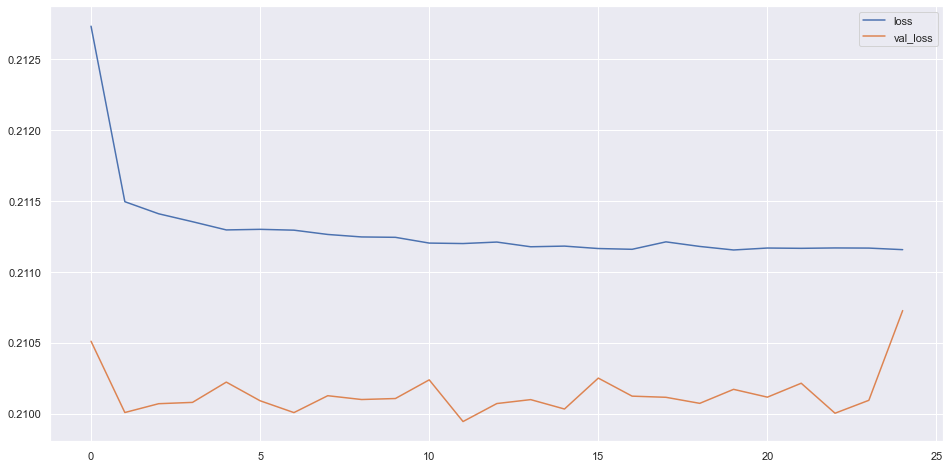

In [ ]:
losses = pd.DataFrame(model.history.history)

losses[['loss','val_loss']].plot()

In [ ]:
#predicting using ANN model
predictions = model.predict_classes(X_test)

AttributeError: 'SVC' object has no attribute 'predict_classes'

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    485956
           1       0.66      0.55      0.60     52019

    accuracy                           0.93    537975
   macro avg       0.81      0.76      0.78    537975
weighted avg       0.92      0.93      0.93    537975



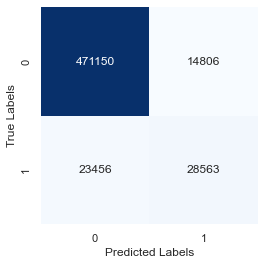

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()

mean_squared_error(y_test, predictions)

In [ ]:
#mean absolute error
mean_absolute_error(y_test, predictions)

0.07112226404572704

In [ ]:
#r2 Score
r2_score(y_test, predictions)

0.18572553892344046

## SVM Model - Linear Kernel

In [ ]:
from sklearn import svm

In [ ]:
# model = svm.SVC(kernel='linear') # Linear Kernel
# model.fit(X_train, y_train)

In [ ]:
#selecting a subset of dataset
X_train_x = X_train.iloc[:20000]
y_train_y = y_train.iloc[:20000]

In [ ]:
model = svm.SVC(kernel='linear') # Linear Kernel

model.fit(X_train_x, y_train_y)

SVC(kernel='linear')

In [ ]:
#prediction on test data
predictions = model.predict(X_test)

In [ ]:
#model's accurary score
model.score(X_test, y_test)

0.9197323295692179

In [ ]:
#save the model

filename = 'SVM_linear_model.sav'
#pickle.dump(model, open(filename, 'wb'))

In [ ]:
###Evaluating SVM linear-kernel model

In [ ]:
#Classification Report
print(classification_report(y_test, predictions, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.93      0.99      0.96    485956
    Positive       0.75      0.26      0.38     52019

    accuracy                           0.92    537975
   macro avg       0.84      0.62      0.67    537975
weighted avg       0.91      0.92      0.90    537975



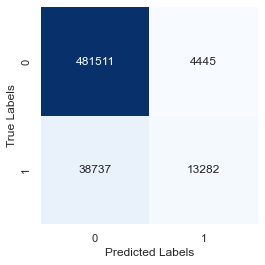

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()

In [ ]:
#mean squared error
mean_squared_error(y_test, predictions)

0.0802676704307821

In [ ]:
#mean absolute error
mean_absolute_error(y_test, predictions)

0.0802676704307821

In [ ]:
#r2 Score
r2_score(y_test, predictions)

0.08102033928681218

### SVM Model - RBF Kernel

In [ ]:
model = svm.SVC(kernel='rbf')

model.fit(X_train_x, y_train_y)

SVC()

In [ ]:
#prediction on test data
predictions = model.predict(X_test)

In [ ]:
#model's accurary score
model.score(X_test, y_test)

0.9291435475626191

In [ ]:
#save the model
filename = 'SVM_rbf_model.sav'
pickle.dump(model, open(filename, 'wb'))

### Evaluating SVM rbf-kernel model

In [ ]:
#Classification Report
print(classification_report(y_test, predictions, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.95      0.97      0.96    485956
    Positive       0.65      0.57      0.61     52019

    accuracy                           0.93    537975
   macro avg       0.80      0.77      0.79    537975
weighted avg       0.93      0.93      0.93    537975



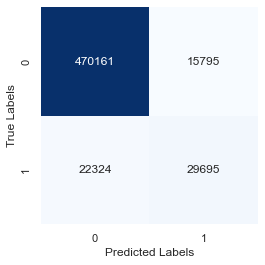

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()

In [ ]:
#mean squared error
mean_squared_error(y_test, predictions)

0.07085645243738092

In [ ]:
#mean absolute error
mean_absolute_error(y_test, predictions)

0.07085645243738092

In [ ]:
#r2 Score
r2_score(y_test, predictions)

0.18876879980718797

### SVM Model polynomial-kernel

In [ ]:
#finding optimum degree for svm polynomial kernel
degree = []
for i in range(1, 6):
    svm_model = svm.SVC(kernel='poly', degree=i)
    svm_model.fit(X_train_x, y_train_y)
    y_predict = svm_model.predict(X_test)
    degree.append(accuracy_score(y_test, y_predict))
    print('Degree= ', i, ": ", accuracy_score(y_test, y_predict))

Degree=  1 :  0.9197323295692179
Degree=  2 :  0.9213476462660904
Degree=  3 :  0.9245262326316278
Degree=  4 :  0.926063478786189
Degree=  5 :  0.9257883730656629


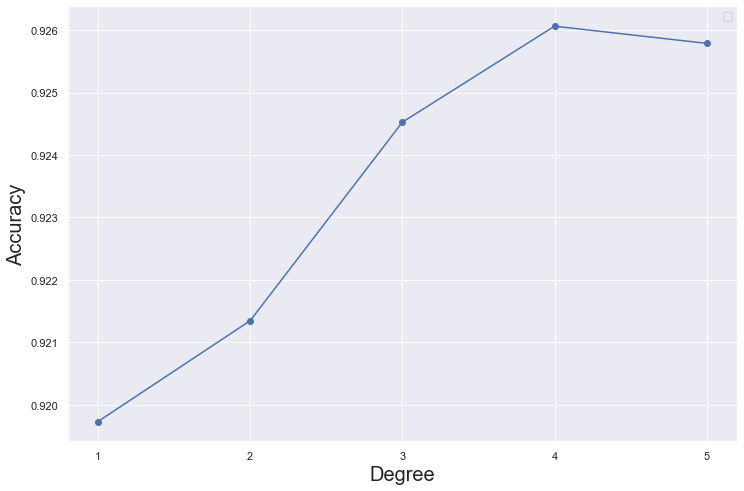

In [ ]:
#ploting the accuracies for different degree
plt.figure(figsize=(12, 8))
plt.plot(range(1, 6), degree, marker='o')
plt.xlabel('Degree', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(range(1, 6))
legend_prop = {'weight':'bold'}
plt.legend(prop=legend_prop)
plt.show()

In [ ]:
#training model with degree=4
model = svm.SVC(kernel='poly', degree=4)

model.fit(X_train_x, y_train_y)

SVC(degree=4, kernel='poly')

In [ ]:
#prediction on test data
predictions = model.predict(X_test)

In [ ]:
#model's accurary score
model.score(X_test, y_test)

0.926063478786189

In [ ]:
#save the model
filename = 'SVM_polynomial_model.sav'
pickle.dump(model, open(filename, 'wb'))

### Evaluating SVM polynomial-kernel model

In [ ]:
#Classification Report
print(classification_report(y_test, predictions, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.95      0.97      0.96    485956
    Positive       0.67      0.47      0.55     52019

    accuracy                           0.93    537975
   macro avg       0.81      0.72      0.76    537975
weighted avg       0.92      0.93      0.92    537975



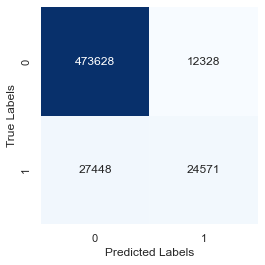

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, square=True,  fmt='d',
           cmap=plt.cm.Blues, cbar=False)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.show()

In [ ]:
#mean squared error
mean_squared_error(y_test, predictions)

0.07393652121381106

In [ ]:
#mean absolute error
mean_absolute_error(y_test, predictions)

0.07393652121381106

In [ ]:
#r2 Score
r2_score(y_test, predictions)

0.15350528033607147

In [ ]:
###Tuning the hyper-parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'linear']}

In [ ]:
grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train_x,y_train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.5s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.6s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.1s
[CV] END ......................C=0.1, gamma=1, 

[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   1.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   1.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   1.1s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   1.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   2.9s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   2.8s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   3.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   3.2s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   3.1s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   1.3s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   1.6s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   1.4s
[CV] END ...................

[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   1.6s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   1.7s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   3.1s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   2.8s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   2.5s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   2.3s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   2.2s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   2.7s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   2.6s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   2.5s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   2.5s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   2.4s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=2)

In [ ]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[469443  16513]
 [ 21325  30694]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96    485956
           1       0.65      0.59      0.62     52019

    accuracy                           0.93    537975
   macro avg       0.80      0.78      0.79    537975
weighted avg       0.93      0.93      0.93    537975

